# Fifa Players Data Analysis
## Adriel Zagala

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#imports needed to visualize and tranform the dataset

In [4]:
df = pd.read_csv ('players_20.csv')
#saving dataset to dataframe

## Requirements


- Load the csv file and show top 5 records from it

In [5]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3



- How you would be able to see each column's name

In [6]:
for col in df.columns:
    print(col)

sofifa_id
player_url
short_name
long_name
age
dob
height_cm
weight_kg
nationality
club
overall
potential
value_eur
wage_eur
player_positions
preferred_foot
international_reputation
weak_foot
skill_moves
work_rate
body_type
real_face
release_clause_eur
player_tags
team_position
team_jersey_number
loaned_from
joined
contract_valid_until
nation_position
nation_jersey_number
pace
shooting
passing
dribbling
defending
physic
gk_diving
gk_handling
gk_kicking
gk_reflexes
gk_speed
gk_positioning
player_traits
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties
mentality_composure
defe

- Show the number of rows and columns in the dataset

In [7]:
print("Number of Columns: ", len(df.columns))
print("Number of Rows: ", len(df))

Number of Columns:  104
Number of Rows:  18278


- Show the number of players in each country

In [8]:
number_players_country = df.groupby("nationality", sort=True)["sofifa_id"].count().sort_values(ascending=False)
number_players_country

nationality
England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
               ... 
Malawi            1
Mauritius         1
St Lucia          1
South Sudan       1
Jordan            1
Name: sofifa_id, Length: 162, dtype: int64

- Show the top 10 countries with the highest amount of players

In [9]:
top_countries = df['nationality'].value_counts()[:10]
top_countries

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: nationality, dtype: int64

- Create a bar plot of the top 5 countries with the highest number of
players, and fill the bars in green

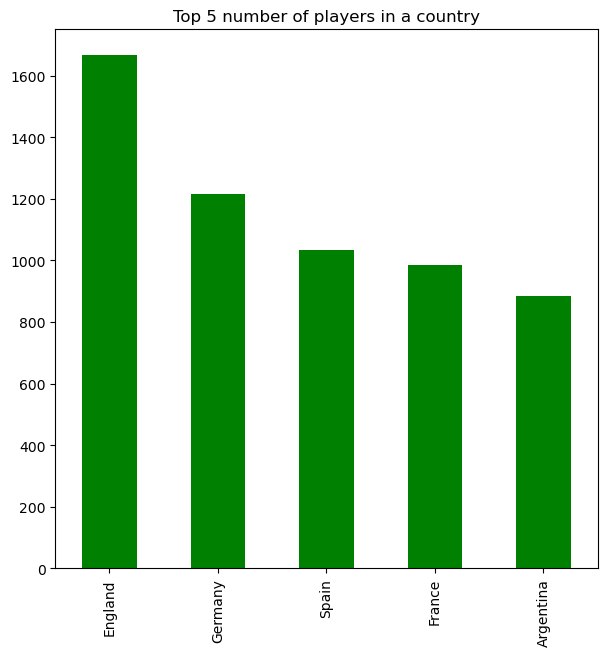

In [10]:
top_5 = df['nationality'].value_counts()[:5]
top_5.plot(kind='bar',figsize=(7,7),color ='green')
plt.title('Top 5 number of players in a country')
plt.show()

- Display the short name and wages for the top 5 players

In [11]:
top_players_wages = df[['short_name','wage_eur']].sort_values(by='wage_eur',ascending=False)[:5]
top_players_wages

,short_name,wage_eur
0,L. Messi,565000
4,E. Hazard,470000
1,Cristiano Ronaldo,405000
5,K. De Bruyne,370000
22,A. Griezmann,370000


- Display the short name and wages for the top 5 players with the highest salaries


In [12]:
top_players_wages = df[['short_name','wage_eur']].sort_values(by='wage_eur',ascending=False)[:5]
top_players_wages['salary'] = top_players_wages['wage_eur'].apply(lambda x: x* 52) #Salary is the wage multiplied by 52 weeks
top_players_wages

,short_name,wage_eur,salary
0,L. Messi,565000,29380000
4,E. Hazard,470000,24440000
1,Cristiano Ronaldo,405000,21060000
5,K. De Bruyne,370000,19240000
22,A. Griezmann,370000,19240000


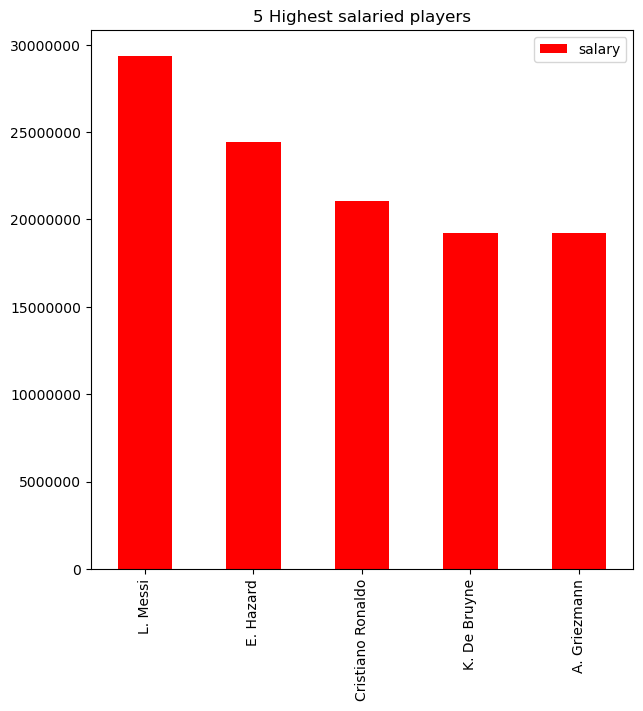

In [13]:
top_players_wages_5 = top_players_wages[['short_name','salary']]
ax = top_players_wages_5.plot(kind='bar',figsize=(7,7),color ='red')
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xticklabels(top_players_wages_5.short_name)
plt.title('5 Highest salaried players')
plt.show()

- Show top 10 records for Germany


In [14]:
germany_players = df[df['nationality'] == 'Germany']
germany_players = germany_players[['sofifa_id','short_name','long_name','dob','height_cm','weight_kg','wage_eur','club','overall']][:10] 
germany_players

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,wage_eur,club,overall
6,192448,M. ter Stegen,Marc-André ter Stegen,1992-04-30,187,85,250000,FC Barcelona,90
31,167495,M. Neuer,Manuel Neuer,1986-03-27,193,92,155000,FC Bayern München,88
36,182521,T. Kroos,Toni Kroos,1990-01-04,183,76,330000,Real Madrid,88
37,188350,M. Reus,Marco Reus,1989-05-31,180,71,170000,Borussia Dortmund,88
49,178603,M. Hummels,Mats Hummels,1988-12-16,191,94,130000,Borussia Dortmund,87
55,222492,L. Sané,Leroy Sané,1996-01-11,183,75,195000,Manchester City,86
61,212622,J. Kimmich,Joshua Kimmich,1995-02-08,176,73,125000,FC Bayern München,86
70,189596,T. Müller,Thomas Müller,1989-09-13,186,75,170000,FC Bayern München,86
77,212190,N. Süle,Niklas Süle,1995-09-03,195,97,115000,FC Bayern München,85
109,235790,K. Havertz,Kai Havertz,1999-06-11,188,83,70000,Bayer 04 Leverkusen,84


- Show the top 5 records of Germany players who have a maximum height,
weight and wage


In [15]:
germany_top_height = germany_players.sort_values(['height_cm'],ascending=False).head(5)
germany_top_height #Highest height for a player in germany

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,wage_eur,club,overall
77,212190,N. Süle,Niklas Süle,1995-09-03,195,97,115000,FC Bayern München,85
31,167495,M. Neuer,Manuel Neuer,1986-03-27,193,92,155000,FC Bayern München,88
49,178603,M. Hummels,Mats Hummels,1988-12-16,191,94,130000,Borussia Dortmund,87
109,235790,K. Havertz,Kai Havertz,1999-06-11,188,83,70000,Bayer 04 Leverkusen,84
6,192448,M. ter Stegen,Marc-André ter Stegen,1992-04-30,187,85,250000,FC Barcelona,90


In [16]:
germany_top_weight = germany_players.sort_values(['weight_kg'],ascending=False).head(5)
germany_top_weight #Highest weight for a player in germany

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,wage_eur,club,overall
77,212190,N. Süle,Niklas Süle,1995-09-03,195,97,115000,FC Bayern München,85
49,178603,M. Hummels,Mats Hummels,1988-12-16,191,94,130000,Borussia Dortmund,87
31,167495,M. Neuer,Manuel Neuer,1986-03-27,193,92,155000,FC Bayern München,88
6,192448,M. ter Stegen,Marc-André ter Stegen,1992-04-30,187,85,250000,FC Barcelona,90
109,235790,K. Havertz,Kai Havertz,1999-06-11,188,83,70000,Bayer 04 Leverkusen,84


In [17]:
germany_top_wages = germany_players.sort_values(['wage_eur'],ascending=False).head(5)
germany_top_wages #Highest wage for a player in germany

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,wage_eur,club,overall
36,182521,T. Kroos,Toni Kroos,1990-01-04,183,76,330000,Real Madrid,88
6,192448,M. ter Stegen,Marc-André ter Stegen,1992-04-30,187,85,250000,FC Barcelona,90
55,222492,L. Sané,Leroy Sané,1996-01-11,183,75,195000,Manchester City,86
37,188350,M. Reus,Marco Reus,1989-05-31,180,71,170000,Borussia Dortmund,88
70,189596,T. Müller,Thomas Müller,1989-09-13,186,75,170000,FC Bayern München,86


- Display the short name and wages of the top 5 Germany players


In [18]:
germany_top5 = germany_players[['short_name','wage_eur','overall']].sort_values(['wage_eur'],ascending=False)[:5]
germany_top5

,short_name,wage_eur,overall
36,T. Kroos,330000,88
6,M. ter Stegen,250000,90
55,L. Sané,195000,86
37,M. Reus,170000,88
70,T. Müller,170000,86



- Show top 5 players who have the best shooting skills among all the
players with short names


In [19]:
top_player_shooting = df[['short_name','overall','shooting','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots']].sort_values('shooting',ascending=False)[:5]
top_player_shooting

,short_name,overall,shooting,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots
1,Cristiano Ronaldo,93,93.0,95,95,85,78,93
0,L. Messi,94,92.0,86,68,75,68,94
12,H. Kane,89,91.0,90,79,87,84,86
17,S. Agüero,89,90.0,89,81,79,74,84
205,F. Quagliarella,83,89.0,90,68,65,74,89


- Show top 5 players records (short name, defending, nationality, and club)
that have awesome defending skills


In [20]:
top_player_defend = df[['short_name','defending','defending_marking','defending_standing_tackle','defending_sliding_tackle','nationality','club']].sort_values('defending',ascending=False)[:5]
top_player_defend

,short_name,defending,defending_marking,defending_standing_tackle,defending_sliding_tackle,nationality,club
16,G. Chiellini,90.0,94,91,89,Italy,Juventus
7,V. van Dijk,90.0,91,92,85,Netherlands,Liverpool
11,K. Koulibaly,89.0,91,90,87,Senegal,Napoli
35,D. Godín,89.0,90,89,87,Uruguay,Inter
49,M. Hummels,89.0,90,89,86,Germany,Borussia Dortmund



- Show wage records of the top 5 players of the 'Real Madrid' team


In [21]:
top_player_real_madrid = df[['short_name','wage_eur','shooting','defending','nationality','club']].sort_values(by='wage_eur',ascending=False)
top_player_real_madrid = top_player_real_madrid[top_player_real_madrid['club'] == 'Real Madrid'][:5]
top_player_real_madrid

,short_name,wage_eur,shooting,defending,nationality,club
4,E. Hazard,470000,83.0,35.0,Belgium,Real Madrid
8,L. Modrić,340000,76.0,72.0,Croatia,Real Madrid
36,T. Kroos,330000,80.0,70.0,Germany,Real Madrid
18,Sergio Ramos,300000,68.0,87.0,Spain,Real Madrid
46,K. Benzema,285000,82.0,39.0,France,Real Madrid



- Show shooting records of top 5 players of 'Real Madrid' team


In [22]:
top_player_real_madrid_shoot = df[['short_name','wage_eur','shooting','nationality','club']].sort_values(by='shooting',ascending=False)
top_player_real_madrid_shoot = top_player_real_madrid_shoot[top_player_real_madrid_shoot['club'] == 'Real Madrid'][:5]
top_player_real_madrid_shoot

,short_name,wage_eur,shooting,nationality,club
100,G. Bale,250000,87.0,Wales,Real Madrid
106,J. Rodríguez,225000,86.0,Colombia,Real Madrid
4,E. Hazard,470000,83.0,Belgium,Real Madrid
46,K. Benzema,285000,82.0,France,Real Madrid
161,L. Jović,155000,82.0,Serbia,Real Madrid



- Show defending records of top 5 players of 'Real Madrid' team


In [23]:
top_player_real_madrid_defend = df[['short_name','wage_eur','defending','defending_marking','defending_standing_tackle','defending_sliding_tackle','nationality','club']].sort_values(by='defending',ascending=False)
top_player_real_madrid_defend = top_player_real_madrid_defend[top_player_real_madrid_defend['club'] == 'Real Madrid'][:5]
top_player_real_madrid_defend

,short_name,wage_eur,defending,defending_marking,defending_standing_tackle,defending_sliding_tackle,nationality,club
18,Sergio Ramos,300000,87.0,85,87,90,Spain,Real Madrid
42,Casemiro,240000,85.0,84,87,86,Brazil,Real Madrid
76,R. Varane,205000,85.0,87,86,85,France,Real Madrid
94,Carvajal,205000,82.0,83,83,85,Spain,Real Madrid
277,Nacho Fernández,165000,81.0,77,85,84,Spain,Real Madrid



- Show nationality records of top 5 players of 'Real Madrid' team


In [24]:
nationality_madrid = df[df['club'] == 'Real Madrid']
nationality_madrid = nationality_madrid[['sofifa_id','short_name','long_name','age','dob','height_cm','weight_kg','nationality']]
nationality_madrid[:5]

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality
4,183277,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium
8,177003,L. Modrić,Luka Modrić,33,1985-09-09,172,66,Croatia
18,155862,Sergio Ramos,Sergio Ramos García,33,1986-03-30,184,82,Spain
28,192119,T. Courtois,Thibaut Courtois,27,1992-05-11,199,96,Belgium
36,182521,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany



### Bonus: You can go beyond the scope of this project and find other results from this data set

In [25]:
ml = df[['age','height_cm','weight_kg','wage_eur','overall','nationality','club']]
ml.describe()

,age,height_cm,weight_kg,wage_eur,overall
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,25.283291,181.362184,75.276343,9456.942773,66.244994
std,4.656964,6.756961,7.047744,21351.714095,6.949953
min,16.000000,156.000000,50.000000,0.000000,48.000000
25%,22.000000,177.000000,70.000000,1000.000000,62.000000
50%,25.000000,181.000000,75.000000,3000.000000,66.000000
75%,29.000000,186.000000,80.000000,8000.000000,71.000000
max,42.000000,205.000000,110.000000,565000.000000,94.000000


In [26]:
ml.median()

C:\Users\bwelp\AppData\Local\Temp\ipykernel_3756\224507594.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  ml.median()


age            25.0
height_cm     181.0
weight_kg      75.0
wage_eur     3000.0
overall        66.0
dtype: float64

In [27]:
mean_age = ml[['age','overall']].groupby('age').mean()
skill_club = ml[['overall','club']].groupby('club').mean().sort_values('overall',ascending=False)[:5]


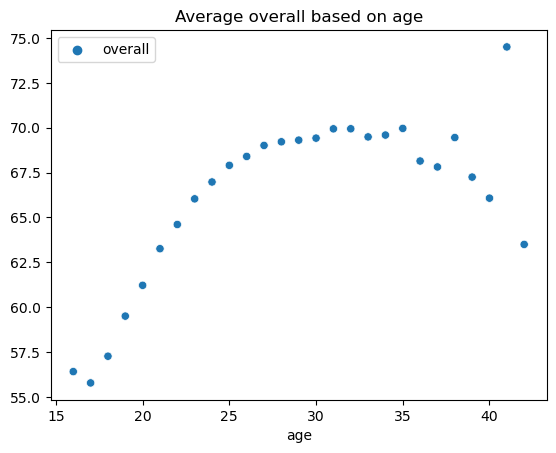

In [28]:
sns.scatterplot(data=mean_age)
plt.title('Average overall based on age')
plt.show()

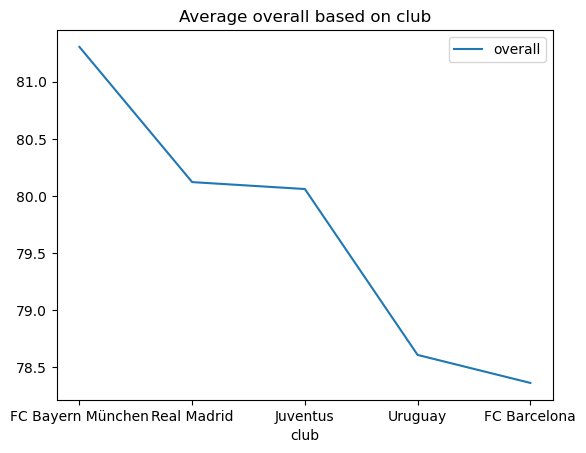

In [29]:
sns.lineplot(data=skill_club)
plt.title('Average overall based on club')
plt.show()

In [30]:
attk_stats = df[['short_name','attacking_finishing', 'attacking_heading_accuracy','attacking_short_passing','attacking_volleys','club','wage_eur','overall']].sort_values('overall',ascending=False)
attk_stats = attk_stats.assign(attk_overall = lambda x:(x['attacking_finishing'] + x['attacking_heading_accuracy'] + x['attacking_short_passing'] + x['attacking_volleys'])/4)
attk_stats[:15]

,short_name,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,club,wage_eur,overall,attk_overall
0,L. Messi,95,70,92,88,FC Barcelona,565000,94,86.25
1,Cristiano Ronaldo,94,89,83,87,Juventus,405000,93,88.25
2,Neymar Jr,87,62,87,87,Paris Saint-Germain,290000,92,80.75
3,J. Oblak,11,15,43,13,Atlético Madrid,125000,91,20.50
4,E. Hazard,84,61,89,83,Real Madrid,470000,91,79.25
5,K. De Bruyne,82,55,92,82,Manchester City,370000,91,77.75
6,M. ter Stegen,14,11,61,14,FC Barcelona,250000,90,25.00
7,V. van Dijk,52,86,78,45,Liverpool,200000,90,65.25
8,L. Modrić,72,55,92,76,Real Madrid,340000,90,73.75
9,M. Salah,90,59,84,79,Liverpool,240000,90,78.00


In [31]:
skill_stats = df[['short_name','skill_dribbling','skill_curve','skill_fk_accuracy','skill_long_passing','skill_ball_control','club','wage_eur','overall']].sort_values('overall',ascending=False)
skill_stats = skill_stats.assign(skill_overall = lambda x: (x['skill_dribbling'] + x['skill_curve'] + x['skill_fk_accuracy']+ x['skill_long_passing']+ x['skill_ball_control'])/5)
skill_stats[:15]

,short_name,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,club,wage_eur,overall,skill_overall
0,L. Messi,97,93,94,92,96,FC Barcelona,565000,94,94.4
1,Cristiano Ronaldo,89,81,76,77,92,Juventus,405000,93,83.0
2,Neymar Jr,96,88,87,81,95,Paris Saint-Germain,290000,92,89.4
3,J. Oblak,12,13,14,40,30,Atlético Madrid,125000,91,21.8
4,E. Hazard,95,83,79,83,94,Real Madrid,470000,91,86.8
5,K. De Bruyne,86,85,83,91,91,Manchester City,370000,91,87.2
6,M. ter Stegen,21,18,12,63,30,FC Barcelona,250000,90,28.8
7,V. van Dijk,70,60,70,81,76,Liverpool,200000,90,71.4
8,L. Modrić,87,85,78,88,92,Real Madrid,340000,90,86.0
9,M. Salah,89,83,69,75,89,Liverpool,240000,90,81.0


In [32]:
movmnt_stats = df[['short_name','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance','club','wage_eur','overall']].sort_values('overall',ascending=False)
movmnt_stats = movmnt_stats.assign(movement_overall = lambda x: (x['movement_acceleration']+ x['movement_sprint_speed']+ x['movement_agility']+ x['movement_reactions'] + x['movement_balance'])/5)
movmnt_stats

,short_name,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,club,wage_eur,overall,movement_overall
0,L. Messi,91,84,93,95,95,FC Barcelona,565000,94,91.6
1,Cristiano Ronaldo,89,91,87,96,71,Juventus,405000,93,86.8
2,Neymar Jr,94,89,96,92,84,Paris Saint-Germain,290000,92,91.0
3,J. Oblak,43,60,67,88,49,Atlético Madrid,125000,91,61.4
4,E. Hazard,94,88,95,90,94,Real Madrid,470000,91,92.2
...,...,...,...,...,...,...,...,...,...,...
18250,R. Roache,51,53,52,47,55,Blackpool,1000,48,51.6
18251,G. Sykes-Kenworthy,31,32,28,47,27,Bradford City,1000,48,33.0
18252,A. Aksungur,64,53,58,49,73,Denizlispor,1000,48,59.4
18253,N. Morley,55,55,42,45,63,Burton Albion,1000,48,52.0


In [33]:
pwr_stats = df[['short_name','power_shot_power','power_jumping','power_stamina','power_strength','power_long_shots','club','wage_eur','overall']].sort_values('overall',ascending=False)
pwr_stats = pwr_stats.assign(power_overall = lambda x : (x['power_shot_power'] + x['power_jumping']+x['power_stamina']+x['power_strength'] + x['power_long_shots'])/5)
pwr_stats

,short_name,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,club,wage_eur,overall,power_overall
0,L. Messi,86,68,75,68,94,FC Barcelona,565000,94,78.2
1,Cristiano Ronaldo,95,95,85,78,93,Juventus,405000,93,89.2
2,Neymar Jr,80,61,81,49,84,Paris Saint-Germain,290000,92,71.0
3,J. Oblak,59,78,41,78,12,Atlético Madrid,125000,91,53.6
4,E. Hazard,82,56,84,63,80,Real Madrid,470000,91,73.0
...,...,...,...,...,...,...,...,...,...,...
18250,R. Roache,46,68,51,44,41,Blackpool,1000,48,50.0
18251,G. Sykes-Kenworthy,34,52,16,38,8,Bradford City,1000,48,29.6
18252,A. Aksungur,49,61,48,50,30,Denizlispor,1000,48,47.6
18253,N. Morley,35,66,62,50,21,Burton Albion,1000,48,46.8


In [34]:
movmnt_total = movmnt_stats[['short_name','overall','movement_overall']]
pwr_total = pwr_stats[['short_name','overall','power_overall']]
skill_total = skill_stats[['short_name','overall','skill_overall']]
attk_total = attk_stats[['short_name','overall','attk_overall']]

overalls = pd.merge(movmnt_total, pwr_total, how = 'inner')
overalls = pd.merge(overalls, skill_total, how = 'inner')
overalls = pd.merge(overalls, attk_total, how = 'inner')
overalls[:10]

,short_name,overall,movement_overall,power_overall,skill_overall,attk_overall
0,L. Messi,94,91.6,78.2,94.4,86.25
1,Cristiano Ronaldo,93,86.8,89.2,83.0,88.25
2,Neymar Jr,92,91.0,71.0,89.4,80.75
3,J. Oblak,91,61.4,53.6,21.8,20.50
4,E. Hazard,91,92.2,73.0,86.8,79.25
5,K. De Bruyne,91,79.6,81.4,87.2,77.75
6,M. ter Stegen,90,50.8,53.6,28.8,25.00
7,V. van Dijk,90,71.0,80.4,71.4,65.25
8,L. Modrić,90,84.4,74.4,86.0,73.75
9,M. Salah,90,91.4,78.2,81.0,78.00
